In [396]:
import pandas as pd
import sys
!{sys.executable} -m pip install openpyxl
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [397]:
# Load the training data 
train_data = pd.read_csv("C:/Users/cdale/OneDrive/Documents/GitHub/Movie_Webscraper/sample_data/train.csv")
train_data.drop_duplicates()
columns_to_drop = ["homepage", "overview", "poster_path", "Keywords", "tagline", "imdb_id", "belongs_to_collection", "id"]
train_data = train_data.drop(columns= columns_to_drop)

# train_data
# Explore the training data
# print(train_data.head(20))
# print(train_data.info())


In [398]:
# Filling in empty data with null values
train_data.replace('', pd.NA, inplace=True)
train_data.replace(0, pd.NA, inplace=True)

# Dropping duplicate values
train_data = train_data.drop_duplicates()

In [399]:
train_data.dropna(subset=['production_companies', 'production_countries', 'spoken_languages', 'cast', 'crew', 'budget', 'genres', 'original_language', 'popularity', 'release_date', 'runtime', 'status', 'title', 'revenue'  ], inplace=True)

# train_data


In [400]:
# Pulls the 'id' key from the dictionary and replaces that number in the "id" column. Then deletes the "belongs to collection" column.
# train_data['belongs_to_collection'] = train_data['belongs_to_collection'].apply(eval)
# train_data['id'] = train_data['belongs_to_collection'].apply(lambda x: x[0]['id'])

# Pulls the genre names from the dictionary in the "genres" column and add them to a new column "genre". Then deletes the "genres" column.
train_data['genres'] = train_data['genres'].apply(eval)
train_data['genre'] = train_data['genres'].apply(lambda x: ", ".join([genre['name'] for genre in x]))
train_data = train_data.drop(columns= "genres")


# Pulls the production company names out of the "production_companies" column and places them in the new column "production_company". Then deletes the "prodution_companies" column.
train_data['production_companies'] = train_data['production_companies'].apply(eval)
train_data['production_company'] = train_data['production_companies'].apply(lambda x: ", ".join([company['name'] for company in x]))
train_data = train_data.drop(columns= "production_companies")


# Pulls the production country names out of the "production_countries" column and places them in the new column "production_country". Then deletes the "prodution_country" column.
train_data['production_countries'] = train_data['production_countries'].apply(eval)
train_data['production_country'] = train_data['production_countries'].apply(lambda x: ", ".join([country['name'] for country in x]))
train_data = train_data.drop(columns= "production_countries")


# Pulls the spoken languages out of the "spoken_languages" column and places them in the new column "spoken_language". Then deletes the "spoken_language" column.
train_data['spoken_languages'] = train_data['spoken_languages'].apply(eval)
train_data['spoken_language'] = train_data['spoken_languages'].apply(lambda x: ", ".join([language['name'] for language in x]))
train_data = train_data.drop(columns= "spoken_languages")



# Isolates the "character" and "name"(actor) keys from the "cast" column and puts them in the new column "cast_info"
train_data['cast'] = train_data['cast'].apply(eval)
train_data['cast_info'] = train_data['cast'].apply(lambda x: [{'character': actor['character'], 'name': actor['name']} for actor in x] if isinstance(x, list) else [])
train_data = train_data.drop(columns='cast')
train_data['actors'] = train_data['cast_info'].apply(lambda x: ", ".join([actor['name'] for actor in x]))
train_data = train_data.drop(columns='cast_info')


#Isolates the 'job' and 'name' key in the crew column
train_data['crew'] = train_data['crew'].apply(eval)
def extract_director_name(crews):
    for crew in crews:
        if 'job' in crew and crew['job'] == "Director" and 'name' in crew:
            return crew['name']
    return 0
    
train_data['director'] = train_data['crew'].apply(extract_director_name)

train_data = train_data.drop(columns='crew')

train_data.replace('', pd.NA, inplace=True)
train_data.replace(0, pd.NA, inplace=True)


train_data.dropna(subset=['genre', 'production_company', 'production_country', 'spoken_language', 'actors', 'director' ], inplace=True)


# train_data




In [401]:
train_data['release_date'] = pd.to_datetime(train_data['release_date'])

train_data['month'] = train_data['release_date'].dt.month

train_data['year'] = train_data['release_date'].dt.year

train_data = train_data.drop(columns='release_date')

C:\Users\cdale\AppData\Local\Temp\ipykernel_17936\1447926577.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_data['release_date'] = pd.to_datetime(train_data['release_date'])


In [402]:
# train_data['original_language'].unique()
train_data['spoken_language'] = train_data['spoken_language'].apply(lambda x: x.lstrip(','))
train_data['spoken_language'].nunique

<bound method IndexOpsMixin.nunique of 0                                                 English
1                                                 English
2                                                 English
6                                                 English
9                                                 English
                              ...                        
2992                                          No Language
2993    български език, English, Français, Pусский, Es...
2997                                              English
2998                                              English
2999                                              English
Name: spoken_language, Length: 2089, dtype: object>

In [403]:
def english_spoken(spoken_language):
    return 'English' in spoken_language

train_data['english_present'] = train_data['spoken_language'].apply(english_spoken).astype(int)

<Axes: >

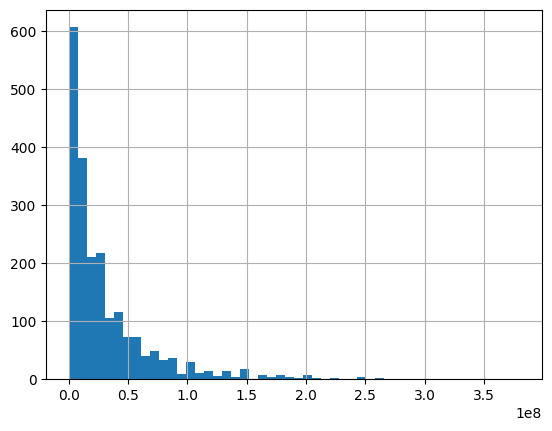

In [404]:
train_data['budget'].hist(bins=50)



<Axes: >

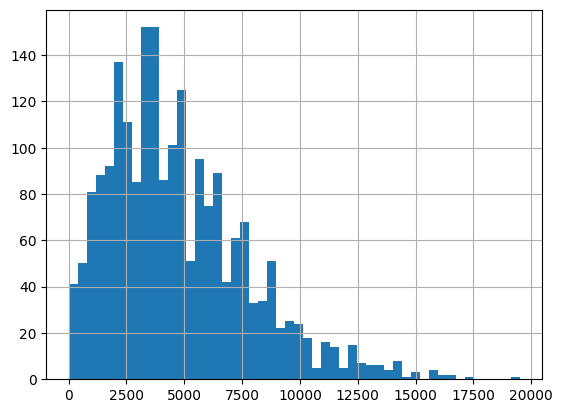

In [406]:
budget_square_root = np.sqrt(train_data['budget'].astype(float))

budget_square_root.hist(bins = 50)

<Axes: >

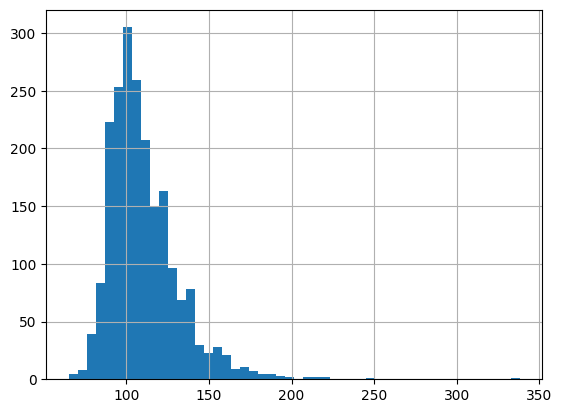

In [407]:
train_data['runtime'].hist(bins=50)

<Axes: >

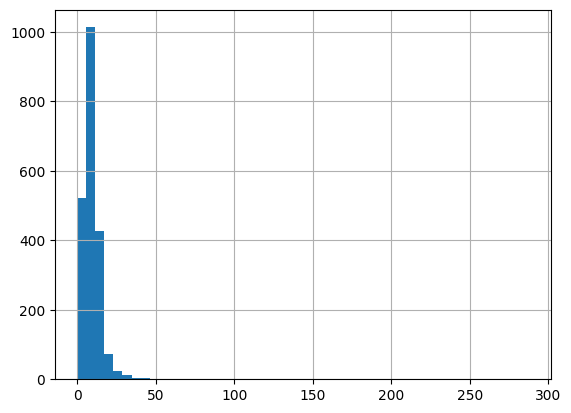

In [408]:
train_data['popularity'].hist(bins=50)

<Axes: >

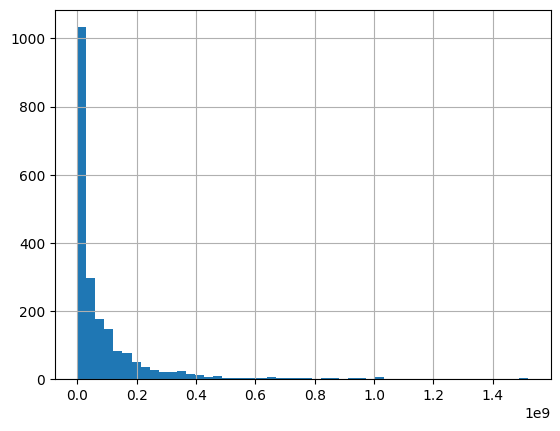

In [409]:
train_data['revenue'].hist(bins=50)

In [416]:
result = train_data[train_data['revenue'] < 1000000]

print(result)

        budget original_language original_title  popularity runtime    status  \
15      500000                sr        Šišanje    1.018477    97.0  Released   
39     3800000                en   Major Dundee    3.055936   123.0  Released   
66    12000000                en  Henry's Crime    5.145185   108.0  Released   
79     1500000                en             31    6.636625   102.0  Released   
96     2500000                fr   Nuit Blanche    2.942355    98.0  Released   
...        ...               ...            ...         ...     ...       ...   
2905   8000000                en    Prefontaine    2.938180   106.0  Released   
2939   9500000                en          Trust    7.778097   104.0  Released   
2942  12000000                zh          消失的子弹    1.675406   108.0  Released   
2982    500000                en        Smashed    4.893812    85.0  Released   
2983  35000000                en  Anna Karenina    5.660835   108.0  Released   

                    title  

In [348]:
train_data_file = "TrainData.xlsx"

train_data.to_excel(train_data_file)
